In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

In [7]:
 #   class Planeta:
  #      def __init__(self,t,e=0.205630,ax=0.387098,alfa=1.1*10**(-8)):
   #         self.t=t
    #        self.dt=t[1]-t[0]
     #       self.e=e
      #      self.ax=ax
       #     self.alfa=alfa
        #    self.G=4*np.pi**2
         #   self.r=np.zeros(2)
          #  self.v=np.zeros_like(self.r)
  #          self.a=np.zeros_like(self.r)
   #         self.r[0]=self.ax*(1.+self.e)
    #        self.v[1]=np.sqrt(self.G*(1.-self.e)/(self.ax*(1.+self.e)))
#
 #           self.R=np.zeros((len(t),len(self.r)))
  #          self.V=np.zeros_like(self.R)


In [8]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = self.r +self.v*self.dt + 0.5*self.a*self.dt**2
            self.af=-self.G/(np.linalg.norm(self.rf))**3*self.rf
            self.vf = self.v+(self.a+self.af)*self.dt/2
            self.v=self.vf
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        ángulo=[]
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
                ángulo.append(np.arcsin(self.R[i][1]/Dist[i]))
            
        return timeup,ángulo

In [9]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.307,t)
    
    return [Mercurio]

In [24]:
dt = 0.000001
tmax = 4.5
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [25]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [26]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|█████████████████████████████████████████████| 4500000/4500000 [04:39<00:00, 16094.14 Steps/s]


In [27]:
Planetas[0].GetPerihelio()

([0.170096,
  0.340198,
  0.510299,
  0.6804,
  0.850502,
  1.020603,
  1.190704,
  1.360805,
  1.530907,
  1.7010079999999999,
  1.871109,
  2.04121,
  2.211312,
  2.381413,
  2.551514,
  2.721616,
  2.891717,
  3.0618179999999997,
  3.231919,
  3.402021,
  3.572122,
  3.7422229999999996,
  3.912324,
  4.082426,
  4.252527,
  4.422628],
 [-0.0003021011295536497,
  -0.0002605127094921309,
  -0.0002762058817499715,
  -0.00029189905364836584,
  -0.0002503106337577469,
  -0.00026600380590966675,
  -0.0002816969767228903,
  -0.00029739014821092506,
  -0.00025580172853431566,
  -0.00027149490092213756,
  -0.0002871880735604953,
  -0.0003028812481764294,
  -0.00026129283107830583,
  -0.0002769860061909653,
  -0.0002926791815956626,
  -0.00025109076599760436,
  -0.0002667839417053783,
  -0.00028247711737660496,
  -0.0002981702922921101,
  -0.000256581875778468,
  -0.00027227505129639453,
  -0.00028796822654717614,
  -0.0003036614016641196,
  -0.00026207298583894376,
  -0.00027776616233373005,

<IPython.core.display.Javascript object>


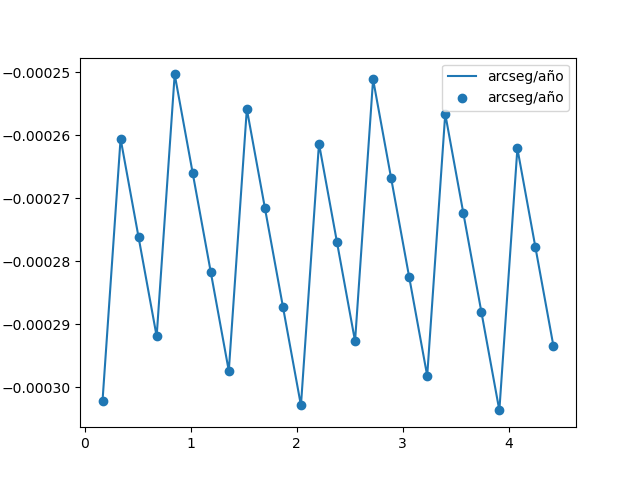

In [28]:
tiempo=Planetas[0].GetPerihelio()[0]
ang_peri=Planetas[0].GetPerihelio()[1]
angul_peri=np.zeros(len(ang_peri))
for i in range(len(ang_peri)):
    if i==0:
        angul_peri[0]=0
    else:
        angul_peri[i]=ang_peri[i]-ang_peri[0]
plt.plot(tiempo,ang_peri,label='arcseg/año')
plt.scatter(tiempo,ang_peri,label='arcseg/año')
plt.legend()